In [195]:
%matplotlib notebook
import sys 
sys.path.append(r"D:\pycharmprojects\insects")
import matplotlib as mpl
import analysis as a #my analysis source
import numpy as np
from IPython.display import Math
import matplotlib.pyplot as plt
import importlib
import scipy as sci
from scipy import stats
from scipy.signal import savgol_filter
from scipy import signal

title_font=14
axes_font=14
tick_font=14
marker_size=6
text_font=16
caption_font=18
legend_font = 10

sub_hspace=8    
sub_wspace=1

#mpl.rcParams['figure.dpi'] = 100 #dpi

G_0 = 7.74809173e10-5

In [150]:
importlib.reload(a)   #run this when modifications are done on 'analysis.py'

<module 'analysis' from 'D:\\pycharmprojects\\insects\\analysis.py'>

# Calculations

## Simple interference

<IPython.core.display.Javascript object>


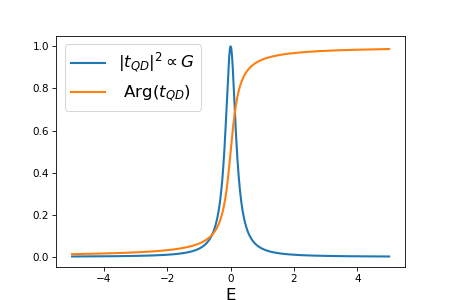

<IPython.core.display.Javascript object>


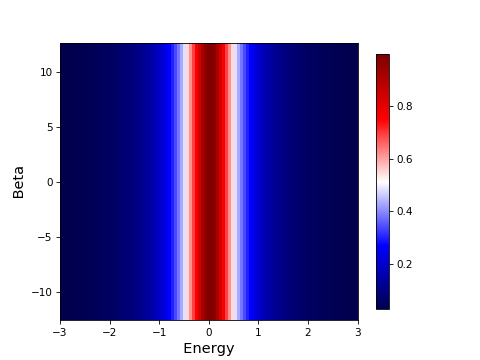

<IPython.core.display.Javascript object>


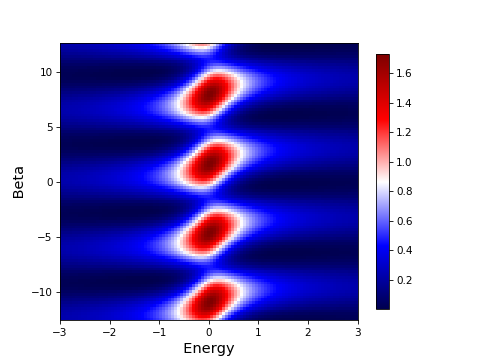

<IPython.core.display.Javascript object>


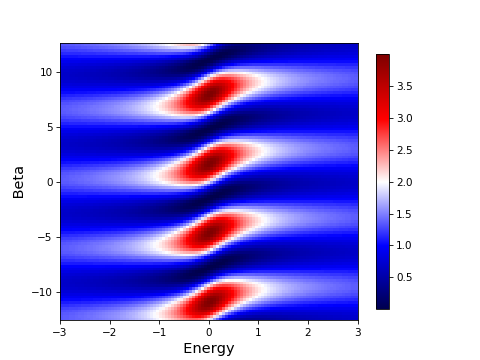

<IPython.core.display.Javascript object>


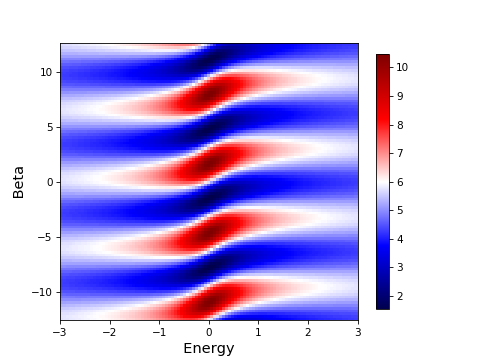

In [5]:
def t_R(G_d, beta):
    y = np.exp(1j*beta)*np.sqrt(G_d)
    return y

def t_QD(z_r, Gamma, energy):
    y = (z_r * Gamma)/(2*energy + 1j*Gamma)
    return y

def t_Fano(G_d, beta, z_r, Gamma, energy):
    y = np.exp(1j*beta)*np.sqrt(G_d) + (z_r * Gamma)/(2*energy + 1j*Gamma)
    return y
    
    
    
beta = 0
G_d = 0.1

energy = np.linspace(-5,5, 1000)
y_QD = t_QD(1, 0.4, energy)


plt.figure(figsize = (6,4))
plt.plot(energy, (np.abs(y_QD))**2, label = '$ | t_{QD} | ^2 \propto G $', linewidth = 2)
plt.plot(energy, np.angle(y_QD)/np.pi + 1.0, label =  ' Arg($t_{QD}$)', linewidth = 2)
plt.xlabel('E' , fontsize = text_font)
plt.legend(loc = 0, fontsize = text_font)
    
#2D plotting
N = 100
energy = np.linspace(-3, 3, N)
beta = np.linspace(-4*np.pi, 4*np.pi, N)
Energy, Beta = np.meshgrid(energy, beta)
Gamma = 1
z_r = 1.
G_ds = [0., 0.1,  1, 5]
for G_d in G_ds:
    
    z = np.abs(t_Fano(G_d, Beta, z_r, Gamma, Energy))**2
    Z = z.reshape(N, N)

    plt.figure()
    plt.pcolor(Energy, Beta, Z, cmap='seismic')
    plt.xlabel('  Energy  ', fontsize = 14)
    plt.ylabel(' Beta ', fontsize = 14)
    plt.colorbar(shrink=.92)








## Interference with an extra non-resonant state 

# Data analysis 

# Charging energy and lever arm

In [115]:
#hard blockade, parameters in ueV
E_c = 450  # uev
V_g = 2800 #uV
alpha = 450/2800 #eV/V
print(alpha)

0.16071428571428573


## Phase mapping

<IPython.core.display.Javascript object>


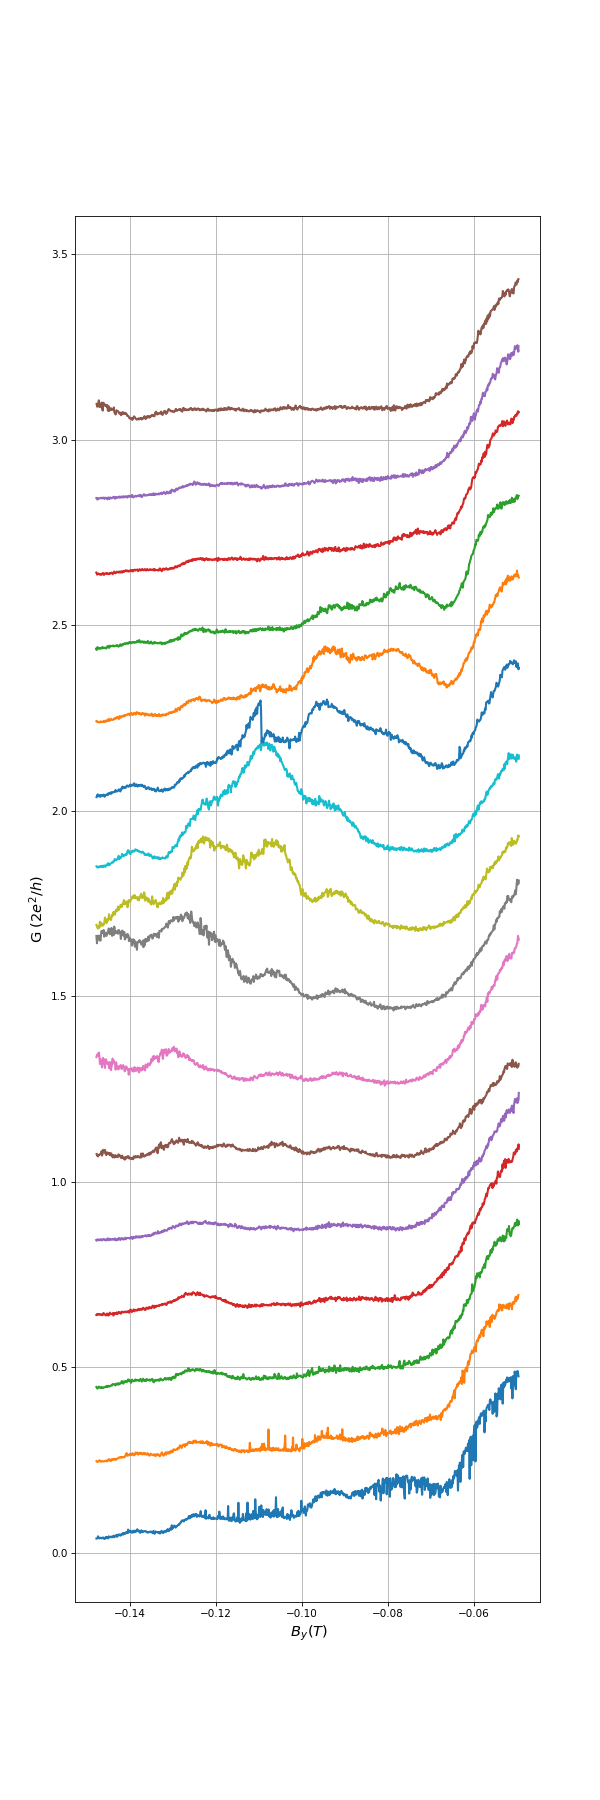

<IPython.core.display.Javascript object>


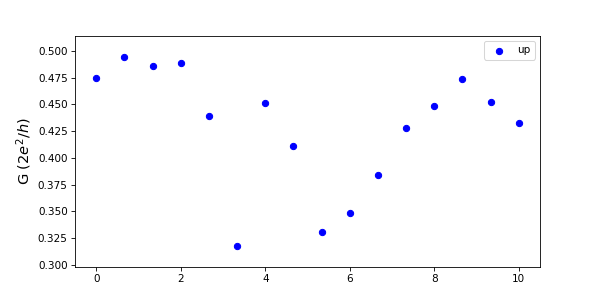

In [53]:
inputFiles_up = [
                                
                                 #'data\\device1_1429.txt'
                                 'data\\device1_1431.txt'
                                 ,'data\\device1_1433.txt'
                                 ,'data\\device1_1435.txt'
                                 ,'data\\device1_1437.txt'
                                 ,'data\\device1_1439.txt'
                                 ,'data\\device1_1441.txt'
                                 ,'data\\device1_1443.txt'
                                 ,'data\\device1_1445.txt'
                                 ,'data\\device1_1447.txt'
                                 ,'data\\device1_1449.txt'
                                 ,'data\\device1_1451.txt'
                                 ,'data\\device1_1453.txt'
                                 ,'data\\device1_1455.txt'
                                 ,'data\\device1_1457.txt'
                                 ,'data\\device1_1459.txt'
                                 ,'data\\device1_1461.txt'
                                 #,'data\\device1_1463.txt'
                                 #,'data\\device1_1465.txt'
                                 #,'data\\device1_1467.txt'
                                 #,'data\\device1_1469.txt'
                                
]
    
inputFiles_up = [    #'data\\device1_1430.txt'
                                 'data\\device1_1432.txt'
                                 ,'data\\device1_1434.txt'
                                 ,'data\\device1_1436.txt'     
                                 ,'data\\device1_1438.txt' 
                                 ,'data\\device1_1440.txt'
                                 ,'data\\device1_1442.txt'
                                 ,'data\\device1_1444.txt'
                                 ,'data\\device1_1446.txt' 
                                 ,'data\\device1_1448.txt'
                                 ,'data\\device1_1450.txt'
                                 ,'data\\device1_1452.txt'
                                 ,'data\\device1_1454.txt'
                                 ,'data\\device1_1456.txt'
                                 ,'data\\device1_1458.txt'
                                 ,'data\\device1_1460.txt'
                                 ,'data\\device1_1462.txt'
                                 #,'data\\device1_1464.txt'
                                 #,'data\\device1_1466.txt'
                                 #,'data\\device1_1468.txt'
                                 #,'data\\device1_1470.txt'
]




PG_ups =  np.linspace(0, 10, len(inputFiles_up))
#PG_ups = np.linspace(0, 1000, 41)
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step



inputFiles_down = None # to not consider the down traces.
PG_downs = None

a.pi_shift_collection( inputFiles_up, 
                    inputFiles_down,
                        gate_inputs =  None,
                        gate_range_up =  PG_ups,
                        gate_range_down =  PG_downs,
                        offset = 0.20,
                       hyst_offset = -0.015)

gates = np.linspace(0, 10,  1*len(inputFiles_up) )
column_B = 2
column_G = 8
window = 351
order = 3
B_min = -0.150
B_max = -0.090

#inputFiles_down = None # to not consider the down traces.
#flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down, column_B, column_G, window, order, B_min, B_max, 
#                      gates, hyst_offset = - 0.012)

[-0.1875 -0.2875 -0.325  -0.3625 -0.4    -0.45   -0.85   -0.9375 -0.175   0.
 -0.0375 -0.175  -0.125  -0.125   0.     -0.075 ]


<IPython.core.display.Javascript object>


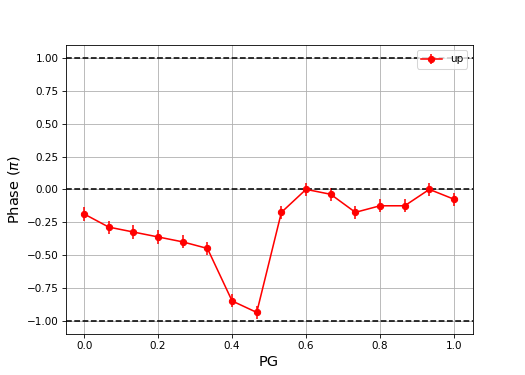

In [55]:
#Phase evolution


max_up = np.array([-0.1203, -0.1211, -0.1214, -0.1217, -0.1220, -0.1224, -0.1256, 
                       -0.1263, -0.1202, -0.1188, -0.1191, -0.1202, -0.1198, -0.1198, 
                       -0.1188, -0.1194])

PG = np.linspace(0,1, len(max_up))


reference = -0.1188
AB_period = 0.016
max_up = 2*((max_up - reference)/AB_period)  #2 is used to have the unit in pi in the plot

print(max_valley1)

plt.figure(figsize = (7,5))


plt.errorbar(PG, max_up, yerr = 0.05,  color = 'green', fmt = '-ro', label = 'up')



plt.axhline(-1, color = 'black', linestyle = '--')
plt.axhline(0, color = 'black', linestyle = '--')
plt.axhline(1, color = 'black', linestyle = '--')
plt.ylabel('Phase ($ \pi $)', fontsize = axes_font)
plt.xlabel('PG',fontsize = axes_font )
#plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend(loc = 0)


## G_cot  = 0.15 G_0

In [196]:
importlib.reload(a)   #run this when modifications are done on 'analysis.py'

<module 'analysis' from 'D:\\pycharmprojects\\insects\\analysis.py'>

<IPython.core.display.Javascript object>


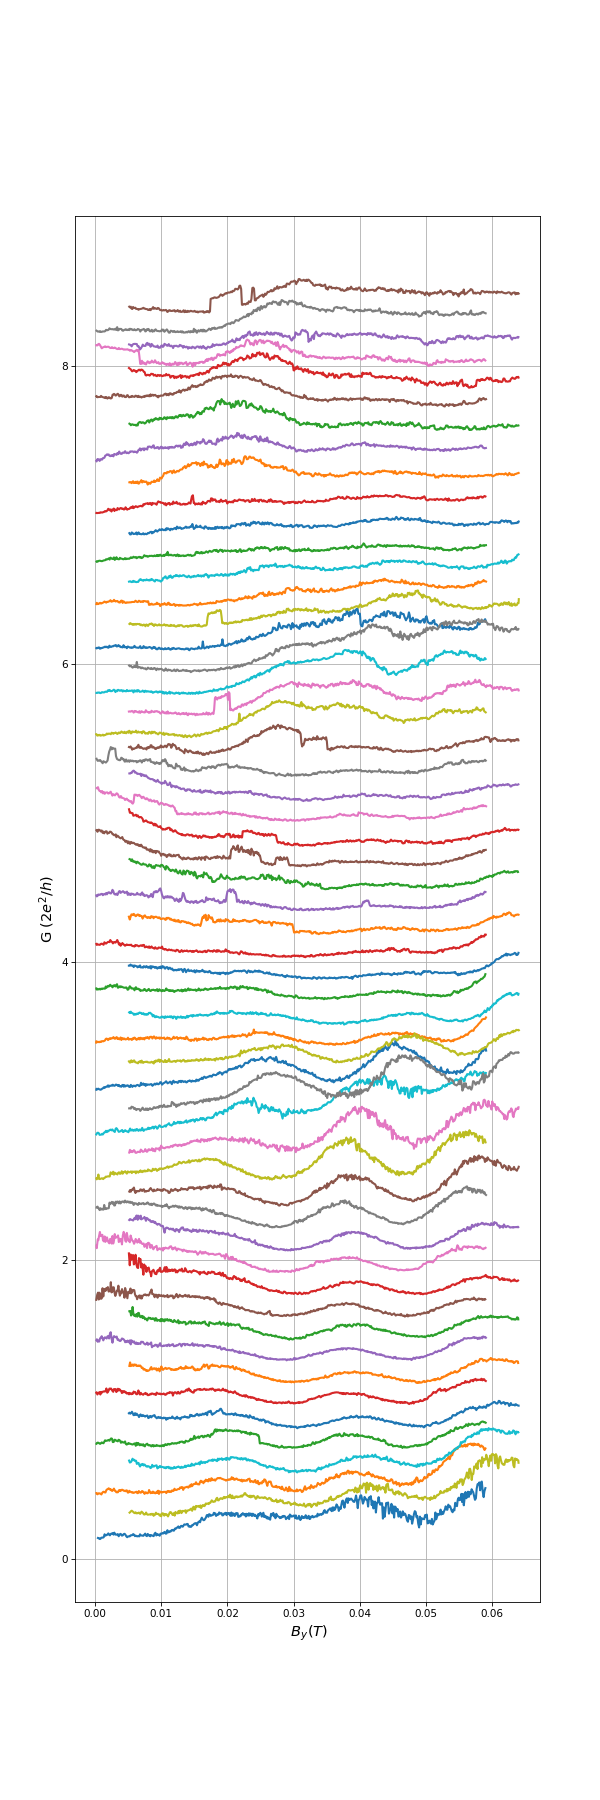

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


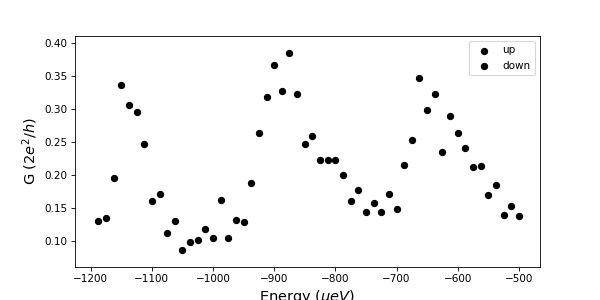

<IPython.core.display.Javascript object>


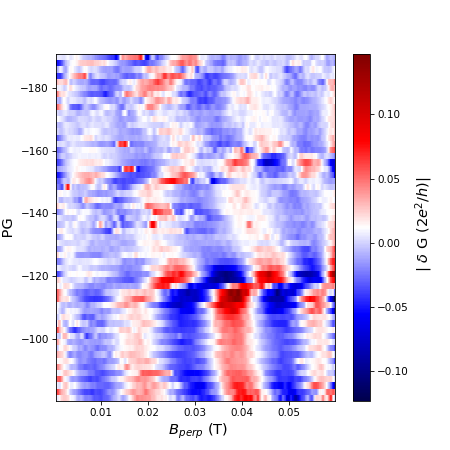

<IPython.core.display.Javascript object>


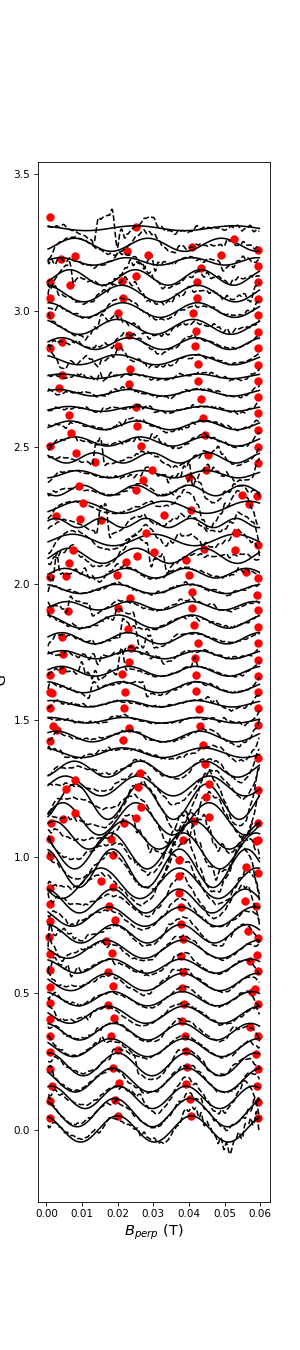

<IPython.core.display.Javascript object>


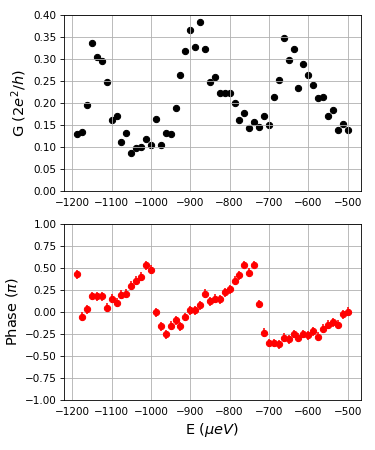

In [191]:
inputFiles_up = [
                                'data\\device1_892.txt'
                                ,'data\\device1_894.txt'                               
                                ,'data\\device1_896.txt'                                 
                                ,'data\\device1_898.txt'                              
                                ,'data\\device1_900.txt'                                 
                                ,'data\\device1_902.txt'                               
                                ,'data\\device1_904.txt'                                
                                ,'data\\device1_906.txt'
                                ,'data\\device1_908.txt' 
                                ,'data\\device1_910.txt'
                                ,'data\\device1_912.txt'
                                ,'data\\device1_914.txt'   
                                ,'data\\device1_916.txt'
                                ,'data\\device1_918.txt'  
                                ,'data\\device1_920.txt'                               
                                ,'data\\device1_922.txt'                                
                                ,'data\\device1_924.txt'                                
                                ,'data\\device1_926.txt'                              
                                ,'data\\device1_928.txt'                               
                                ,'data\\device1_930.txt'                             
                                ,'data\\device1_932.txt'                             
                                ,'data\\device1_934.txt'                              
                                ,'data\\device1_936.txt'                              
                                ,'data\\device1_938.txt'                                
                                ,'data\\device1_940.txt'                               
                                ,'data\\device1_942.txt'                              
                                ,'data\\device1_944.txt'                               
                                ,'data\\device1_946.txt'                             
                               
]

inputFiles_down = [
                                'data\\device1_893.txt'
                                ,'data\\device1_895.txt'                               
                                ,'data\\device1_897.txt'                                 
                                ,'data\\device1_899.txt'                              
                                ,'data\\device1_901.txt'                                 
                                ,'data\\device1_903.txt'                               
                                ,'data\\device1_905.txt'                                
                                ,'data\\device1_907.txt'
                                ,'data\\device1_909.txt' 
                                ,'data\\device1_911.txt'
                                ,'data\\device1_913.txt'
                                ,'data\\device1_915.txt'   
                                ,'data\\device1_917.txt'
                                ,'data\\device1_919.txt'  
                                ,'data\\device1_921.txt'                               
                                ,'data\\device1_923.txt'                                
                                ,'data\\device1_925.txt'                                
                                ,'data\\device1_927.txt'                              
                                ,'data\\device1_929.txt'                               
                                ,'data\\device1_931.txt'                             
                                ,'data\\device1_933.txt'                             
                                ,'data\\device1_935.txt'                              
                                ,'data\\device1_937.txt'                              
                                ,'data\\device1_939.txt'                                
                                ,'data\\device1_941.txt'                               
                                ,'data\\device1_943.txt'                              
                                ,'data\\device1_945.txt'                               
                                ,'data\\device1_947.txt'                             
]

PG_ups = np.linspace(-500, -1175, 28)
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step


starting_points_up,  starting_points_down = a.pi_shift_collection( inputFiles_up, 
                                                                    inputFiles_down,
                                                                    gate_inputs = None ,
                                                                    gate_range_up = PG_ups ,
                                                                    gate_range_down =PG_downs,
                                                                    offset = 0.3,
                                                                   hyst_offset = -0.005)
starting_points = []
for index in range(0, len(starting_points_up)):
    starting_points.append(starting_points_up[index])
    starting_points.append(starting_points_down [index])

gates = np.linspace(PG_ups[0], PG_downs[-1], 2*len(inputFiles_up))
column_B = 2
column_G = 8
window = 301
order = 3
B_min = 0.000
B_max = 0.070

energy =  gates*alpha

#inputFiles_down = None # to not consider the down traces.
flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down, column_B, column_G, window, order, B_min, B_max, 
                      energy, hyst_offset = -0.015)

max_evolution = [0.040705212,0.04042466,0.039302451,0.039583004,0.039302451,0.038881623,0.038039967,0.038601071,0.038180243,0.038320519,0.037899691,0.038320519,0.037759415,0.037899691,0.037198311,0.0373421,0.037338587,0.038460795,0.041546868,0.045755149,0.044913493,0.045755149,0.044632941,0.044071837,0.0431431,0.042809352,0.0420374,0.042107972,0.04182742,0.042669076,0.041406592,0.040845488,0.040845488,0.040144108,0.039162175,0.039802,0.0392289,0.0382737,0.0391334,0.0406616,0.0452465,0.0457241,0.044492665,0.044071837,0.043510733,0.042669076,0.0425288,0.041687144,0.042107972,0.04112604,0.042388524,0.042388524,0.0423982,0.040985764,0.0401874,0.0447441]
max_evolution = np.array(max_evolution)


reference = 0.040705212
AB_period = 0.0189
max_evolution = 2*((max_evolution - reference)/AB_period)  #2 is used to have the unit in pi in the plot


fig = plt.figure(figsize=(5, 6))

ax1 = fig.add_subplot(211)
ax1.scatter(gates, starting_points, marker='o', color='black')
ax1.set_ylabel('G ($ 2e^2/h $)', fontsize = axes_font)
ax1.grid(True)
ax1.set_ylim(0.0, 0.4)

ax2 = fig.add_subplot(212)
ax2.errorbar(gates, max_evolution, yerr = 0.05,  color = 'green', fmt = 'ro')
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Phase ($ \pi $)', fontsize = axes_font)
ax2.set_xlabel('E ($ \mu eV $)',fontsize = axes_font )
ax2.grid(True)

#removing the tick axis
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False    
    
plt.tight_layout()


## G_cot = 0.10 G_0  - unsure

In [168]:
importlib.reload(a)   #run this when modifications are done on 'analysis.py'

<module 'analysis' from 'D:\\pycharmprojects\\insects\\analysis.py'>

<IPython.core.display.Javascript object>


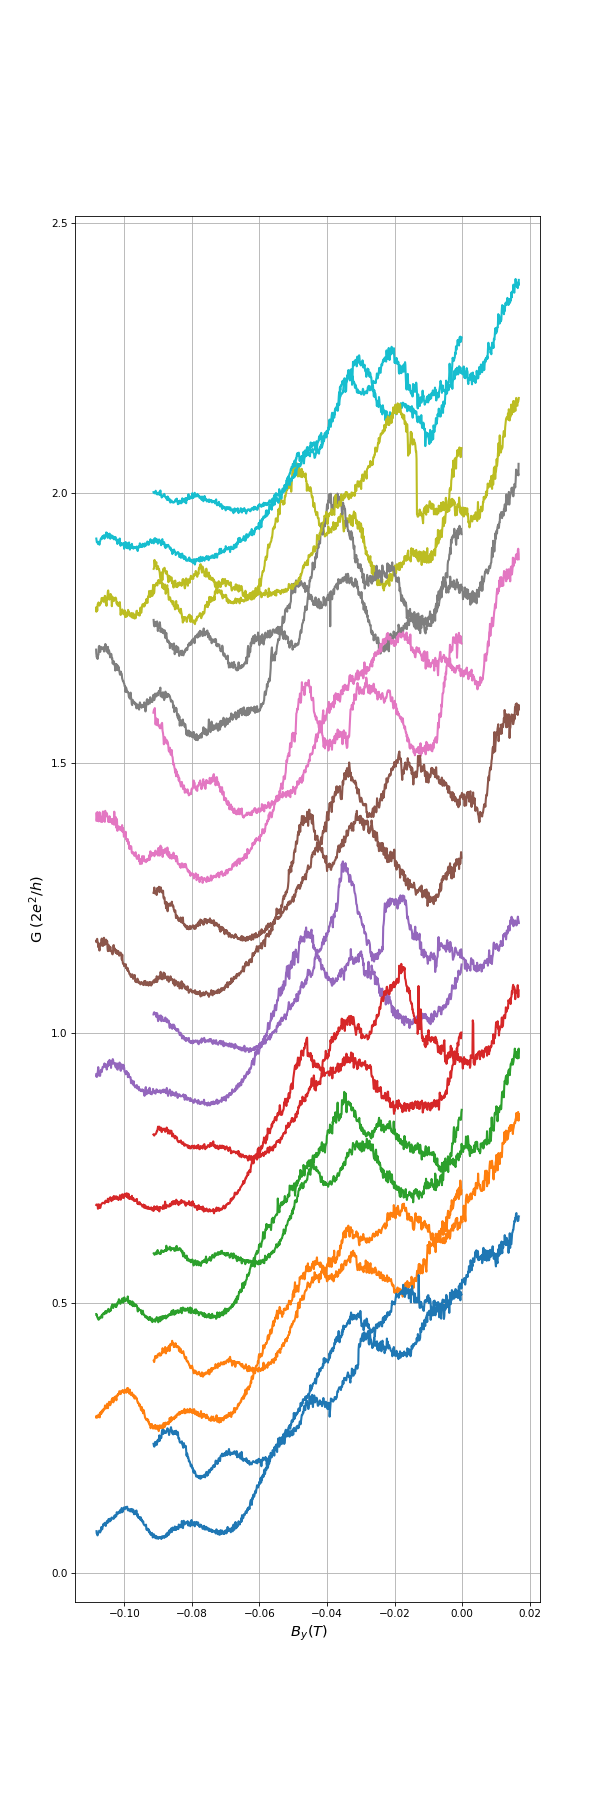

<IPython.core.display.Javascript object>


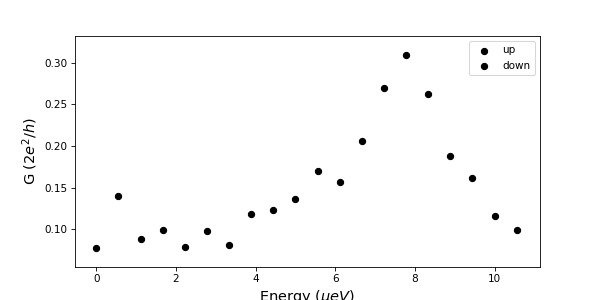

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<IPython.core.display.Javascript object>


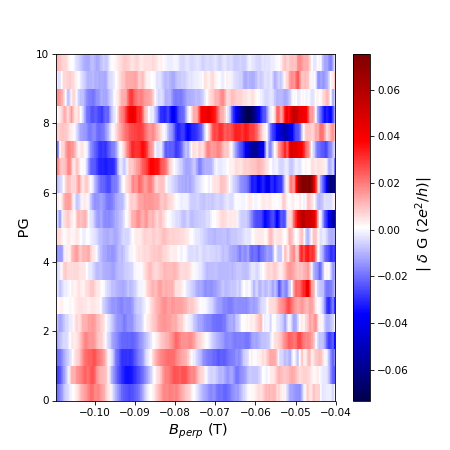

<IPython.core.display.Javascript object>


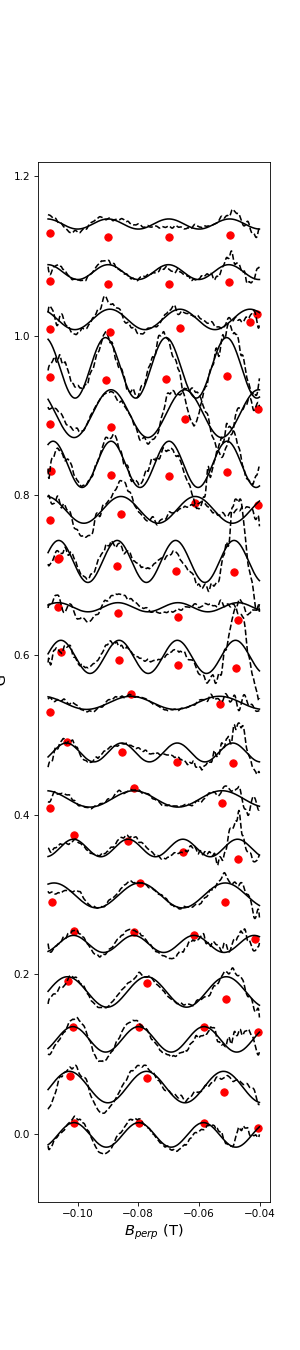

In [171]:
inputFiles_up = [
                                #  'data\\device1_1258.txt'
                                # ,'data\\device1_1260.txt'
                                # ,'data\\device1_1262.txt'
                                # ,'data\\device1_1264.txt'
                                # ,'data\\device1_1266.txt'
                                 #'data\\device1_1268.txt'
                                 'data\\device1_1270.txt'
                                 ,'data\\device1_1272.txt'
                                 ,'data\\device1_1274.txt'
                                 ,'data\\device1_1276.txt'
                                ,'data\\device1_1278.txt'
                                ,'data\\device1_1280.txt'
                                ,'data\\device1_1282.txt'
                                ,'data\\device1_1284.txt'
                                ,'data\\device1_1286.txt'
                                ,'data\\device1_1288.txt'
                                #,'data\\device1_1290.txt'
                                #,'data\\device1_1292.txt'
                                #,'data\\device1_1294.txt'
                                #,'data\\device1_1296.txt'
                                #,'data\\device1_1298.txt'
                                #,'data\\device1_1300.txt'
                                #,'data\\device1_1302.txt'
                                #,'data\\device1_1304.txt'
                                #,'data\\device1_1306.txt'
                                #'data\\device1_1308.txt'
                                #,'data\\device1_1310.txt'
                                #,'data\\device1_1312.txt'
                                #,'data\\device1_1314.txt'
                                #,'data\\device1_1316.txt'
                                #,'data\\device1_1318.txt'
                                #,'data\\device1_1320.txt'
                                #,'data\\device1_1322.txt'
                                #,'data\\device1_1324.txt'
                                #,'data\\device1_1326.txt'
                                #,'data\\device1_1328.txt'
                                #,'data\\device1_1330.txt'
                                #'data\\device1_1332.txt'
                                #,'data\\device1_1334.txt'
                                #,'data\\device1_1336.txt'
                                #,'data\\device1_1338.txt'
]

inputFiles_down = [
                                 # 'data\\device1_1259.txt'
                                 #,'data\\device1_1261.txt'
                                 #,'data\\device1_1263.txt'
                                 #,'data\\device1_1265.txt'
                                 #,'data\\device1_1267.txt'
                                 #'data\\device1_1269.txt'
                                 'data\\device1_1271.txt'
                                 ,'data\\device1_1273.txt'
                                 ,'data\\device1_1275.txt'
                                 ,'data\\device1_1277.txt'
                                 ,'data\\device1_1279.txt'
                                 ,'data\\device1_1281.txt'
                                 ,'data\\device1_1283.txt'
                                 ,'data\\device1_1285.txt'
                                 ,'data\\device1_1287.txt'
                                 ,'data\\device1_1289.txt'
                                 #,'data\\device1_1291.txt'
                                 #,'data\\device1_1293.txt'
                                 #,'data\\device1_1295.txt'
                                 #,'data\\device1_1297.txt'
                                 #,'data\\device1_1299.txt'
                                 #,'data\\device1_1301.txt'
                                 #,'data\\device1_1303.txt'
                                 #,'data\\device1_1305.txt'
                                 #,'data\\device1_1307.txt'
                                 #'data\\device1_1309.txt'
                                 #,'data\\device1_1311.txt'
                                 #,'data\\device1_1313.txt'
                                 #,'data\\device1_1315.txt'
                                 #,'data\\device1_1317.txt'
                                 #,'data\\device1_1319.txt'
                                 #,'data\\device1_1321.txt'
                                 #,'data\\device1_1323.txt'
                                 #,'data\\device1_1325.txt'
                                 #,'data\\device1_1327.txt'
                                 #,'data\\device1_1329.txt'
                                 ##,'data\\device1_1331.txt'
                                 #'data\\device1_1333.txt'
                                 #,'data\\device1_1335.txt'
                                 #,'data\\device1_1337.txt'
                                 #,'data\\device1_1339.txt'
]

PG_ups =  np.linspace(0, 10, len(inputFiles_up))
#PG_ups =  np.linspace(100, 600, len(inputFiles_up))
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step


a.pi_shift_collection( inputFiles_up, 
                        inputFiles_down,
                        gate_inputs =  [],
                        gate_range_up =  PG_ups,
                        gate_range_down =  PG_downs,
                        offset = 0.20,
                       hyst_offset = -0.017)

gates = np.linspace(0, 10, 2*len(inputFiles_up))
column_B = 2
column_G = 8
window = 351
order = 3

B_min = -0.110
B_max = -0.040

#inputFiles_down =  None
flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down  , column_B, column_G, window, order, B_min, B_max, 
                      gates, hyst_offset = -0.017)









    
 

## G_cot = 0.04 G_0 - data set 1

<IPython.core.display.Javascript object>


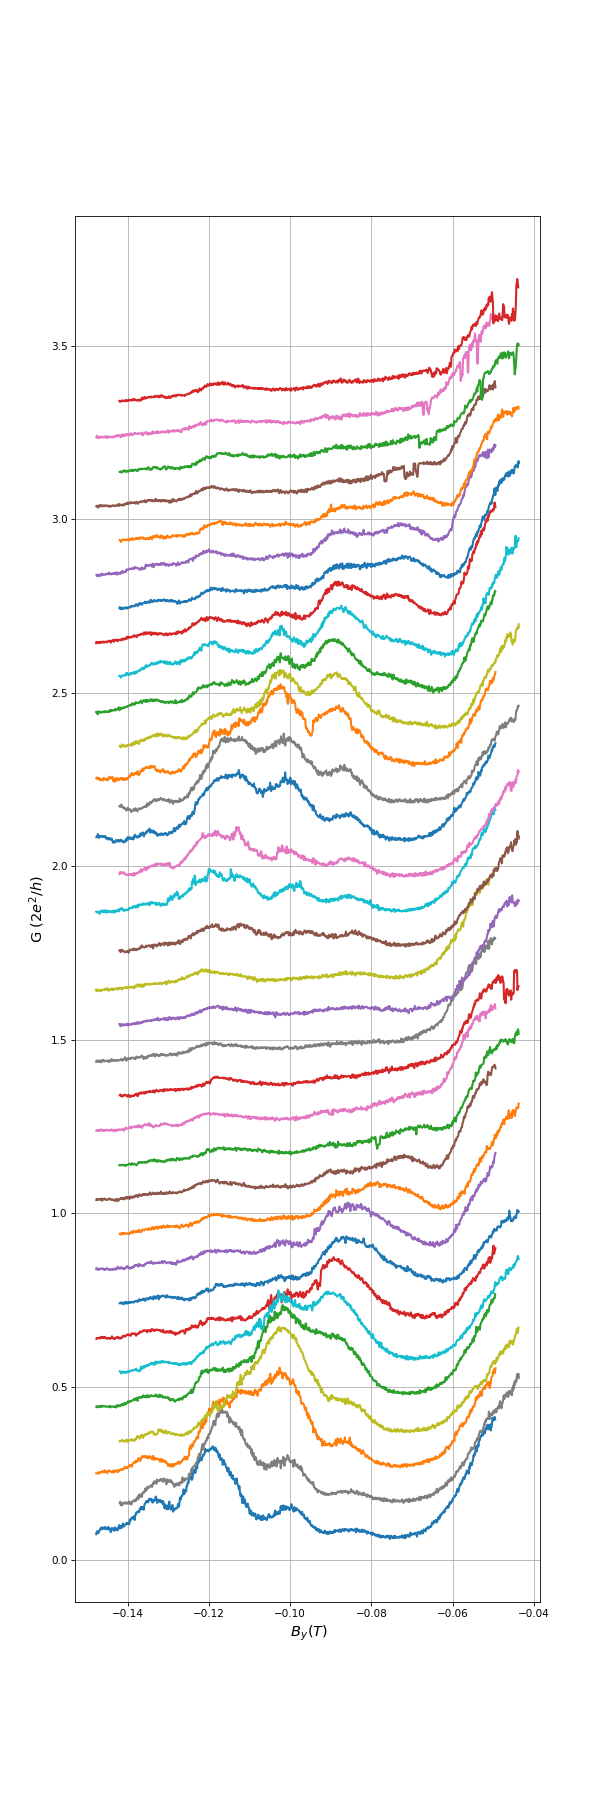

<IPython.core.display.Javascript object>


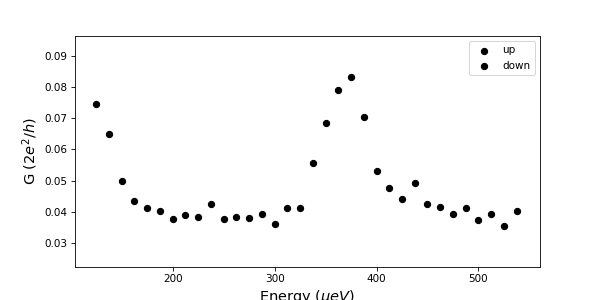

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<IPython.core.display.Javascript object>


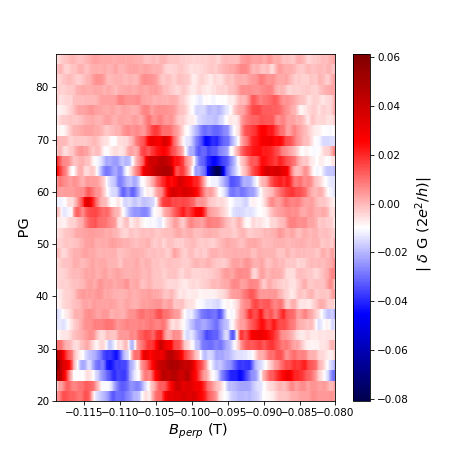

<IPython.core.display.Javascript object>


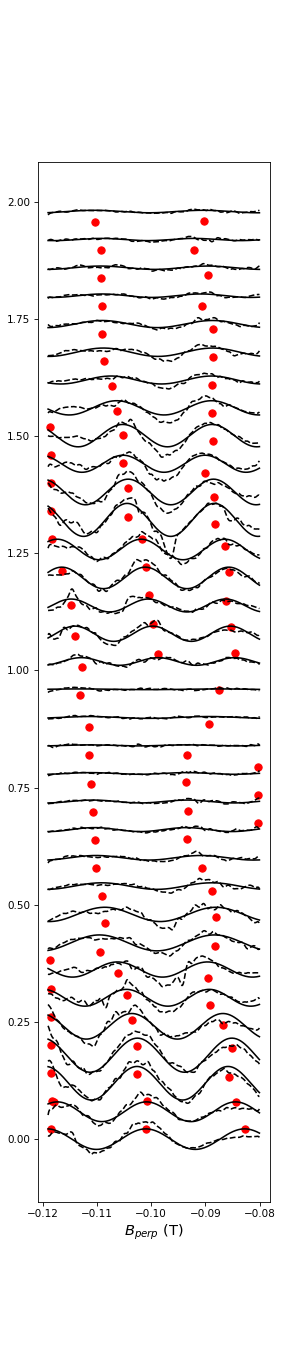

<IPython.core.display.Javascript object>


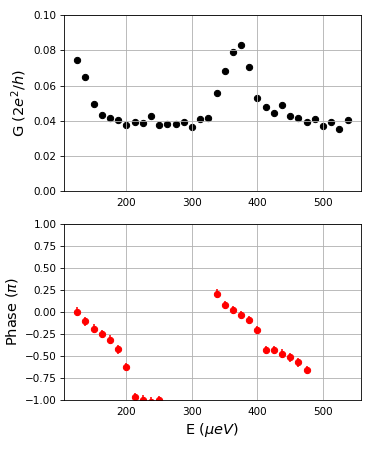

In [197]:
inputFiles_up = [
                                 #'data\\device1_1384.txt'
                                 'data\\device1_1386.txt'
                                 ,'data\\device1_1388.txt'
                                 ,'data\\device1_1390.txt'
                                 ,'data\\device1_1392.txt'
                                 ,'data\\device1_1394.txt'
                                 ,'data\\device1_1396.txt'
                                 ,'data\\device1_1398.txt'
                                 ,'data\\device1_1400.txt'
                                 ,'data\\device1_1402.txt'
                                 ,'data\\device1_1404.txt'
                                 ,'data\\device1_1406.txt'
                                 ,'data\\device1_1408.txt'
                                 ,'data\\device1_1410.txt'
                                 ,'data\\device1_1412.txt'
                                 ,'data\\device1_1414.txt'
                                 ,'data\\device1_1416.txt'
                                 ,'data\\device1_1418.txt'
                                 #,'data\\device1_1420.txt'
                                 #,'data\\device1_1422.txt'
                                 #,'data\\device1_1424.txt'
                            
                                 
]

inputFiles_down = [              #'data\\device1_1385.txt'
                                 'data\\device1_1387.txt'
                                 ,'data\\device1_1389.txt'
                                 ,'data\\device1_1391.txt'
                                 ,'data\\device1_1393.txt'
                                 ,'data\\device1_1395.txt'
                                 ,'data\\device1_1397.txt'
                                 ,'data\\device1_1399.txt'
                                 ,'data\\device1_1401.txt'
                                 ,'data\\device1_1403.txt'
                                 ,'data\\device1_1405.txt'
                                 ,'data\\device1_1407.txt'
                                 ,'data\\device1_1409.txt'
                                 ,'data\\device1_1411.txt' 
                                 ,'data\\device1_1413.txt'
                                 ,'data\\device1_1415.txt'
                                 ,'data\\device1_1417.txt'
                                 ,'data\\device1_1419.txt'
                                 #,'data\\device1_1421.txt'
                                 #,'data\\device1_1423.txt'
                                 #,'data\\device1_1425.txt'

]





PG_ups = np.linspace(125, 525, 17 )
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step


starting_points_up,  starting_points_down = a.pi_shift_collection( inputFiles_up, 
                        inputFiles_down,
                        gate_inputs =  [],
                        gate_range_up =  PG_ups,
                        gate_range_down =  PG_downs,
                        offset = 0.20,
                       hyst_offset = -0.0058)

starting_points = []
for index in range(0, len(starting_points_up)):
    starting_points.append(starting_points_up[index])
    starting_points.append(starting_points_down [index])

gates = np.linspace(PG_ups[0], PG_downs[-1], 2*len(inputFiles_up))
column_B = 2
column_G = 8
window = 301
order = 3
B_min = -0.119
B_max = -0.080

energy =  gates*alpha
#inputFiles_down = None # to not consider the down traces.
flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down, column_B, column_G, window, order, B_min, B_max, 
                      energy, hyst_offset = -0.0058)

max_evolution = [-0.100564,-0.101587,-0.102405,-0.102951,-0.103565,-0.104588,-0.106498,-0.109772,-0.110045,-0.11025,-0.110104,0,0,0,0,0,0,-0.0986186,-0.099829,-0.100367,-0.100905,-0.101443,-0.102519,-0.104671,-0.104671,-0.105074,-0.105477,-0.106015,-0.106822,0,0,0,0,0
]
max_evolution = np.array(max_evolution)


reference = -0.100564
AB_period = 0.0189
max_evolution = 2*((max_evolution - reference)/AB_period)  #2 is used to have the unit in pi in the plot


fig = plt.figure(figsize=(5, 6))

ax1 = fig.add_subplot(211)
ax1.scatter(gates, starting_points, marker='o', color='black')
ax1.set_ylabel('G ($ 2e^2/h $)', fontsize = axes_font)
ax1.grid(True)
ax1.set_ylim(0.0, 0.10)

ax2 = fig.add_subplot(212)
ax2.errorbar(gates, max_evolution, yerr = 0.05,  color = 'green', fmt = 'ro')
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Phase ($ \pi $)', fontsize = axes_font)
ax2.set_xlabel('E ($ \mu eV $)',fontsize = axes_font )
ax2.grid(True)

#removing the tick axis
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False    
    
plt.tight_layout()


## G_cot = 0.04 G_0 - data set 2 'Single Peak'

In [27]:
PG_start = -300
PG_end = 200
PG_steps = 21


PG_ups = np.linspace(PG_start, PG_end, PG_steps)
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step


PG_ups =  np.linspace(-275, 100, 16 )

step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step

print(PG_downs)
gates = np.linspace(-275, 112.5, 32)

print(gates)

[-262.5 -237.5 -212.5 -187.5 -162.5 -137.5 -112.5  -87.5  -62.5  -37.5
  -12.5   12.5   37.5   62.5   87.5  112.5]
[-275.  -262.5 -250.  -237.5 -225.  -212.5 -200.  -187.5 -175.  -162.5
 -150.  -137.5 -125.  -112.5 -100.   -87.5  -75.   -62.5  -50.   -37.5
  -25.   -12.5    0.    12.5   25.    37.5   50.    62.5   75.    87.5
  100.   112.5]


<IPython.core.display.Javascript object>


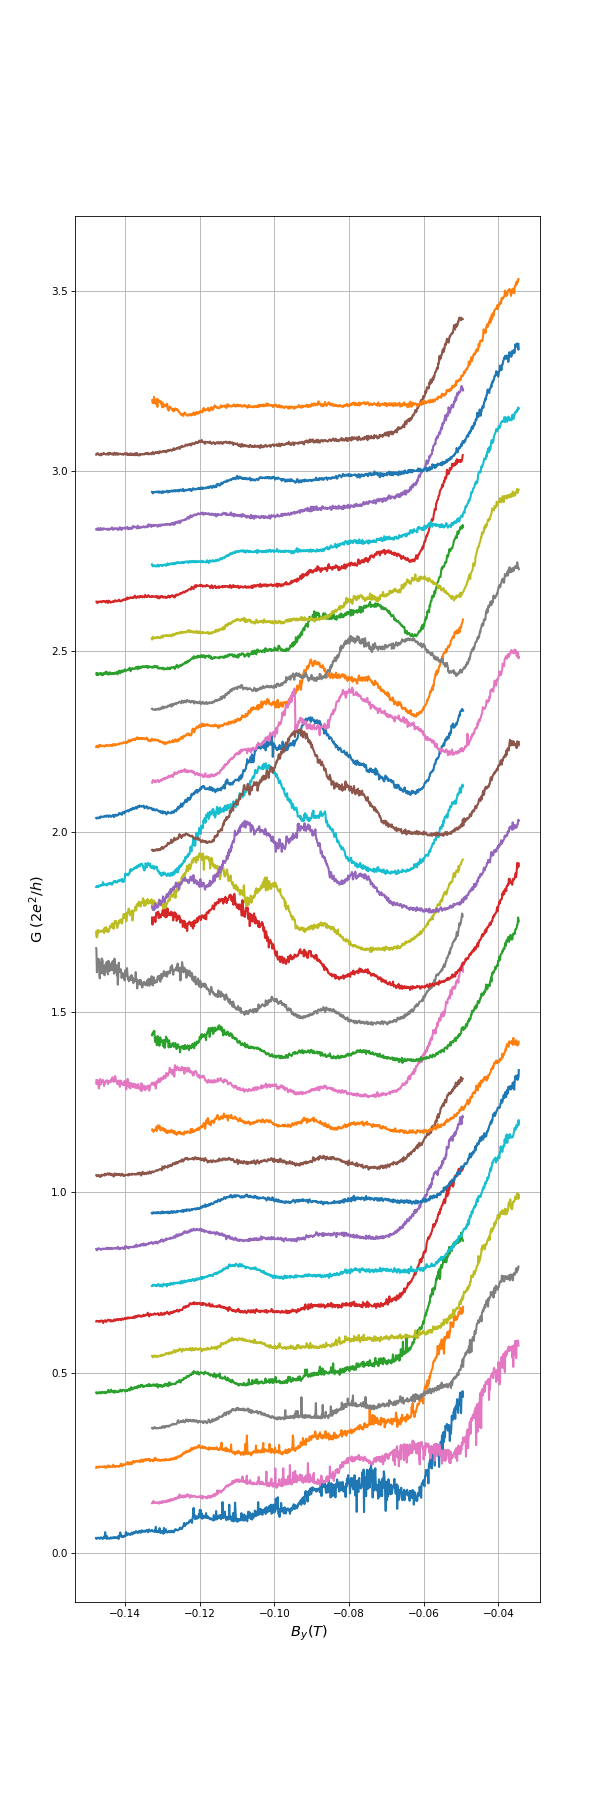

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


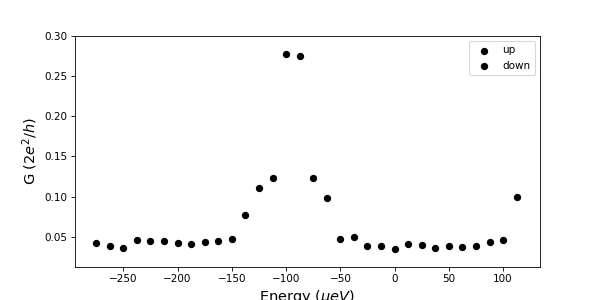

<IPython.core.display.Javascript object>


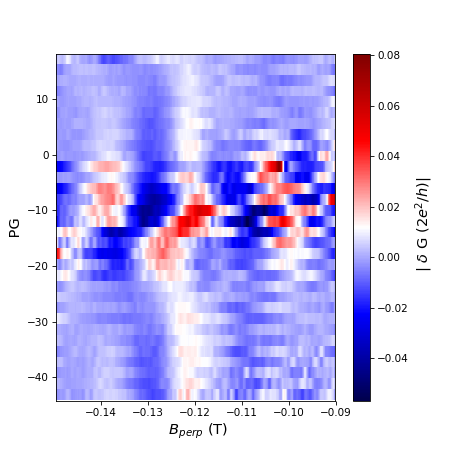

<IPython.core.display.Javascript object>


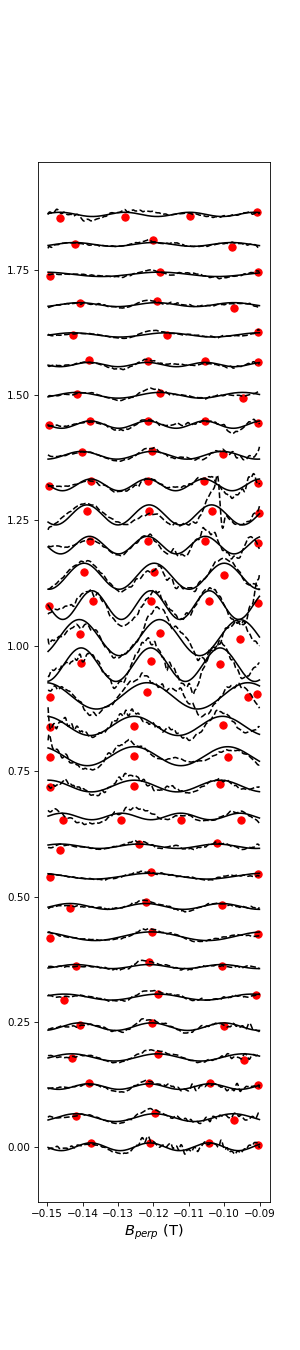

<IPython.core.display.Javascript object>


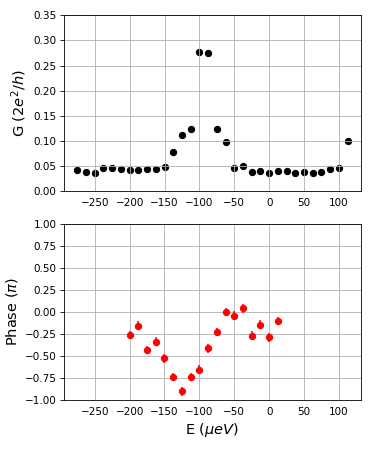

In [194]:
inputFiles_up = [
                                
                                 #'data\\device1_1429.txt'
                                 'data\\device1_1431.txt'
                                 ,'data\\device1_1433.txt'
                                 ,'data\\device1_1435.txt'
                                 ,'data\\device1_1437.txt'
                                 ,'data\\device1_1439.txt'
                                 ,'data\\device1_1441.txt'
                                 ,'data\\device1_1443.txt'
                                 ,'data\\device1_1445.txt'
                                 ,'data\\device1_1447.txt'
                                 ,'data\\device1_1449.txt'
                                 ,'data\\device1_1451.txt'
                                 ,'data\\device1_1453.txt'
                                 ,'data\\device1_1455.txt'
                                 ,'data\\device1_1457.txt'
                                 ,'data\\device1_1459.txt'
                                 ,'data\\device1_1461.txt'
                                 #,'data\\device1_1463.txt'
                                 #,'data\\device1_1465.txt'
                                 #,'data\\device1_1467.txt'
                                 #,'data\\device1_1469.txt'
                                
]
    
inputFiles_down = [    #'data\\device1_1430.txt'
                                 'data\\device1_1432.txt'
                                 ,'data\\device1_1434.txt'
                                 ,'data\\device1_1436.txt'     
                                 ,'data\\device1_1438.txt' 
                                 ,'data\\device1_1440.txt'
                                 ,'data\\device1_1442.txt'
                                 ,'data\\device1_1444.txt'
                                 ,'data\\device1_1446.txt' 
                                 ,'data\\device1_1448.txt'
                                 ,'data\\device1_1450.txt'
                                 ,'data\\device1_1452.txt'
                                 ,'data\\device1_1454.txt'
                                 ,'data\\device1_1456.txt'
                                 ,'data\\device1_1458.txt'
                                 ,'data\\device1_1460.txt'
                                 ,'data\\device1_1462.txt'
                                 #,'data\\device1_1464.txt'
                                 #,'data\\device1_1466.txt'
                                 #,'data\\device1_1468.txt'
                                 #,'data\\device1_1470.txt'
]



PG_ups =  np.linspace(-275, 100, 16 )
#PG_ups =  np.linspace(0, 10, len(inputFiles_up))
#PG_ups = np.linspace(0, 1000, 41)
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step


starting_points_up,  starting_points_down = a.pi_shift_collection( inputFiles_up, 
                    inputFiles_down,
                        gate_inputs =  None,
                        gate_range_up =  PG_ups,
                        gate_range_down =  PG_downs,
                        offset = 0.20,
                       hyst_offset = -0.015)


starting_points = []
for index in range(0, len(starting_points_up)):
    starting_points.append(starting_points_up[index])
    starting_points.append(starting_points_down [index])

gates = np.linspace(-275, 112.5, 32)
column_B = 2
column_G = 8
window = 351
order = 3
B_min = -0.150
B_max = -0.090

energy = gates*alpha

#inputFiles_down = None # to not consider the down traces.
flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down, column_B, column_G, window, order, B_min, B_max, 
                      energy, hyst_offset = - 0.012)

max_evolution = [0,0,0,0,0,0,-0.121507,-0.120502,-0.12311,-0.12223,-0.123997,-0.12602,-0.127574,-0.12602,-0.125244,-0.122914,-0.121167,-0.119031,-0.119419,-0.118642,-0.121555,-0.12039,-0.121749,-0.120002,0,0,0,0,0,0,0,0
]
max_evolution = np.array(max_evolution)


reference = -0.119
AB_period = 0.0189
max_evolution = 2*((max_evolution - reference)/AB_period)  #2 is used to have the unit in pi in the plot


#
#plt.figure(figsize = (8,4))
#plt.errorbar(gates, max_evolution, yerr = 0.05,  color = 'green', fmt = 'ro')
#plt.axhline(-1, color = 'black', linestyle = '--')
#plt.axhline(0, color = 'black', linestyle = '--')
#plt.axhline(1, color = 'black', linestyle = '--')
#plt.ylabel('Phase ($ \pi $)', fontsize = axes_font)
#plt.xlabel('Energy ($ \mu eV $)',fontsize = axes_font )
#plt.grid(True)
#plt.xlim(-275, 112.5)
#plt.ylim(-1.5, 1.5)
#plt.legend(loc = 0)
#



fig = plt.figure(figsize=(5, 6))

ax1 = fig.add_subplot(211)
ax1.scatter(gates, starting_points, marker='o', color='black')
ax1.set_ylabel('G ($ 2e^2/h $)', fontsize = axes_font)
ax1.grid(True)
ax1.set_ylim(0.0, 0.35)

ax2 = fig.add_subplot(212)
ax2.errorbar(gates, max_evolution, yerr = 0.05,  color = 'green', fmt = 'ro')
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Phase ($ \pi $)', fontsize = axes_font)
ax2.set_xlabel('E ($ \mu eV $)',fontsize = axes_font )
ax2.grid(True)

#removing the tick axis
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False  
    
plt.tight_layout()

## G_cot = 0.04 G_0 - data set 2 'Multiple Peaks'

<IPython.core.display.Javascript object>


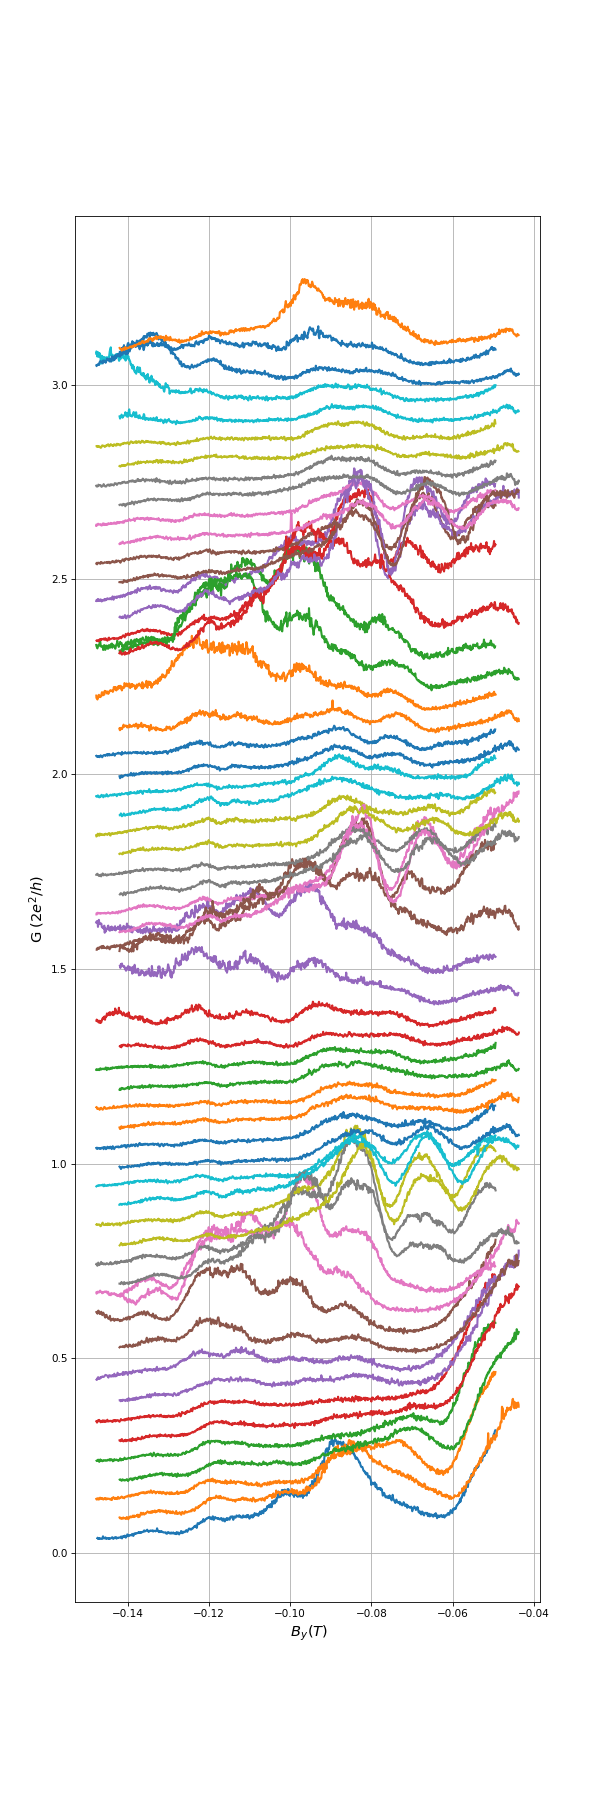

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


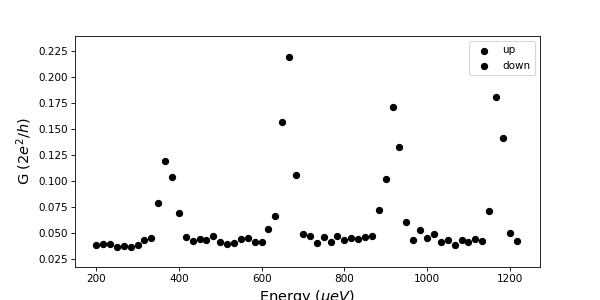

<IPython.core.display.Javascript object>


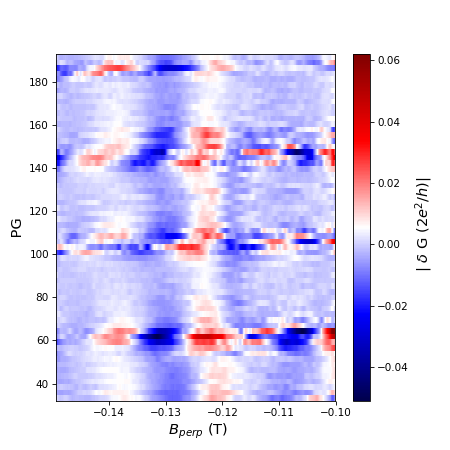

<IPython.core.display.Javascript object>


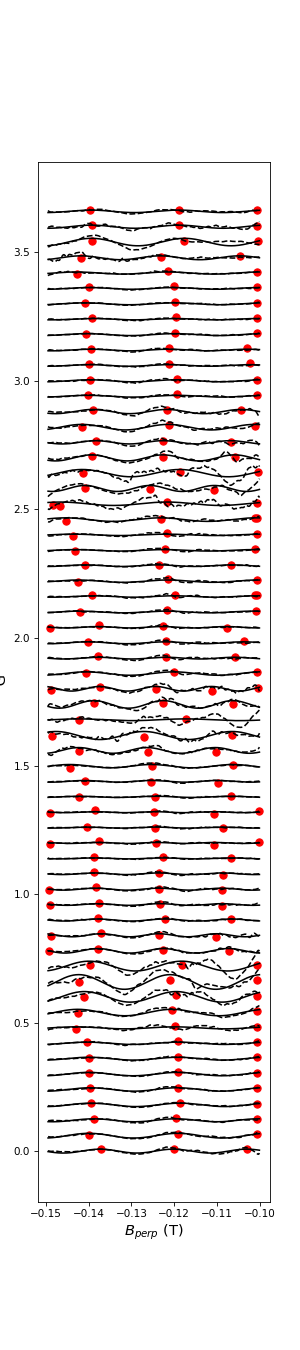

<IPython.core.display.Javascript object>


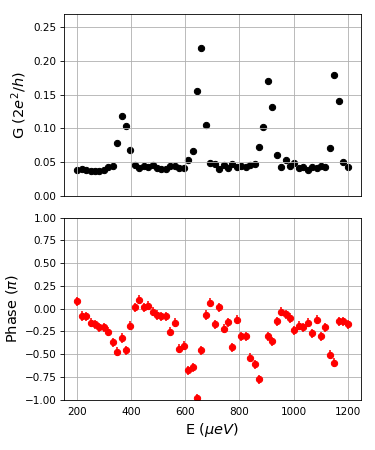

In [193]:
inputFiles_up = [
                                
                                  'data\\device1_1471.txt'
                                 ,'data\\device1_1473.txt'
                                 ,'data\\device1_1475.txt'
                                 ,'data\\device1_1477.txt'
                                 ,'data\\device1_1479.txt'
                                 ,'data\\device1_1481.txt'
                                 ,'data\\device1_1483.txt'
                                 ,'data\\device1_1485.txt'
                                 ,'data\\device1_1487.txt'
                                 ,'data\\device1_1489.txt'
                                 ,'data\\device1_1491.txt'
                                 ,'data\\device1_1493.txt'
                                 ,'data\\device1_1495.txt'
                                 ,'data\\device1_1497.txt'
                                 ,'data\\device1_1499.txt'
                                 ,'data\\device1_1501.txt'
                                 ,'data\\device1_1503.txt'
                                 ,'data\\device1_1505.txt'
                                 ,'data\\device1_1507.txt'
                                 ,'data\\device1_1509.txt'
                                 ,'data\\device1_1511.txt'
                                 ,'data\\device1_1513.txt'
                                 ,'data\\device1_1515.txt'
                                 ,'data\\device1_1517.txt'
                                 ,'data\\device1_1519.txt'
                                 ,'data\\device1_1521.txt'
                                 ,'data\\device1_1523.txt'
                                 ,'data\\device1_1525.txt'
                                 ,'data\\device1_1527.txt'
                                 ,'data\\device1_1529.txt'
                                 ,'data\\device1_1531.txt'
                                
]
    
inputFiles_down = [              'data\\device1_1472.txt'
                                 ,'data\\device1_1474.txt'
                                 ,'data\\device1_1476.txt'
                                 ,'data\\device1_1478.txt'
                                 ,'data\\device1_1480.txt'
                                 ,'data\\device1_1482.txt'
                                 ,'data\\device1_1484.txt'
                                 ,'data\\device1_1486.txt'
                                 ,'data\\device1_1488.txt'
                                 ,'data\\device1_1490.txt'
                                 ,'data\\device1_1492.txt'
                                 ,'data\\device1_1494.txt'
                                 ,'data\\device1_1496.txt'
                                 ,'data\\device1_1498.txt'
                                 ,'data\\device1_1500.txt'
                                 ,'data\\device1_1502.txt'
                                 ,'data\\device1_1504.txt'
                                 ,'data\\device1_1506.txt'
                                 ,'data\\device1_1508.txt'
                                 ,'data\\device1_1510.txt'
                                 ,'data\\device1_1512.txt'
                                 ,'data\\device1_1514.txt'
                                 ,'data\\device1_1516.txt'
                                 ,'data\\device1_1518.txt'
                                 ,'data\\device1_1520.txt'
                                 ,'data\\device1_1522.txt'
                                 ,'data\\device1_1524.txt'
                                 ,'data\\device1_1526.txt'
                                 ,'data\\device1_1528.txt'
                                 ,'data\\device1_1530.txt'
                                 ,'data\\device1_1532.txt'
                   
]




PG_ups =  np.linspace(200, 1200, len(inputFiles_up))
#PG_ups = np.linspace(0, 1000, 41)
step = (PG_ups[1]-PG_ups[0])/2.
PG_downs = PG_ups + step




starting_points_up,  starting_points_down = a.pi_shift_collection( inputFiles_up, 
                    inputFiles_down ,
                        gate_inputs =  None,
                        gate_range_up =  PG_ups,
                        gate_range_down =  PG_downs,
                        offset = 0.10,
                       hyst_offset = -0.0058)

gates = np.linspace(200, 1200, 2*len(inputFiles_up)  )
column_B = 2
column_G = 8
window = 301
order = 3
B_min = -0.150
B_max = -0.100


starting_points = []
for index in range(0, len(starting_points_up)):
    starting_points.append(starting_points_up[index])
    starting_points.append(starting_points_down [index])

energy = alpha*gates

#inputFiles_down = None # to not consider the down traces.
flat_B, flat_gate, Residuals = a.colorplot_residuals(inputFiles_up, inputFiles_down, column_B, column_G, window, order, B_min, B_max, 
                      energy, hyst_offset = -0.010)


max_evolution = [-0.137229968,-0.13877,-0.138824461,-0.139462258,-0.139621708,-0.139940606,-0.139940606,-0.140418954,-0.14152,-0.142491795,-0.141056751,-0.142332346,-0.139781157,-0.137867766,-0.137070519,-0.137867766,-0.137708316,-0.138346113,-0.138665012,-0.138824461,-0.138821,-0.140418954,-0.139454,-0.142172896,-0.141871,-0.144405186,-0.144121,-0.147295,-0.142332346,-0.138665012,-0.137389418,-0.139623,-0.137867766,-0.140100056,-0.139447,-0.142013447,-0.13914336,-0.140865,-0.140897302,-0.143129592,-0.143767389,-0.145361882,-0.148391418,-0.140897302,-0.14137565,-0.139302809,-0.138346113,-0.138613,-0.138983911,-0.140259505,-0.139781157,-0.139940606,-0.139462258,-0.140578403,-0.13914336,-0.140897302,-0.139940606,-0.142810693,-0.143649,-0.139302809,-0.139302809,-0.139621708
]
max_evolution = np.array(max_evolution)


reference = -0.138
AB_period = 0.0189
max_evolution = 2*((max_evolution - reference)/AB_period)  #2 is used to have the unit in pi in the plot




fig = plt.figure(figsize=(5, 6))

ax1 = fig.add_subplot(211)
ax1.scatter(gates, starting_points, marker='o', color='black')
ax1.set_ylabel('G ($ 2e^2/h $)', fontsize = axes_font)
ax1.grid(True)
ax1.set_ylim(0.0, 0.27)
ax1.set_xticklabels([])

ax2 = fig.add_subplot(212)
ax2.errorbar(gates, max_evolution, yerr = 0.05,  color = 'green', fmt = 'ro')
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Phase ($ \pi $)', fontsize = axes_font)
ax2.set_xlabel('E ($ \mu eV $)',fontsize = axes_font )
ax2.grid(True)


#removing the tick axis
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
for tic in ax2.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False    
    
plt.tight_layout()





<IPython.core.display.Javascript object>


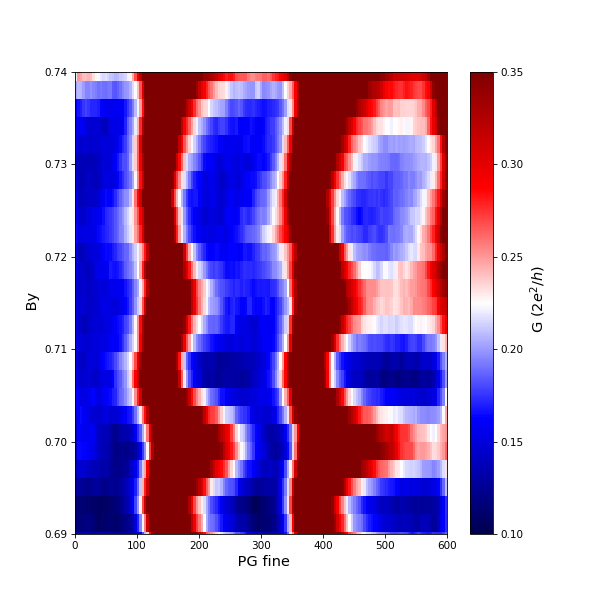

<IPython.core.display.Javascript object>


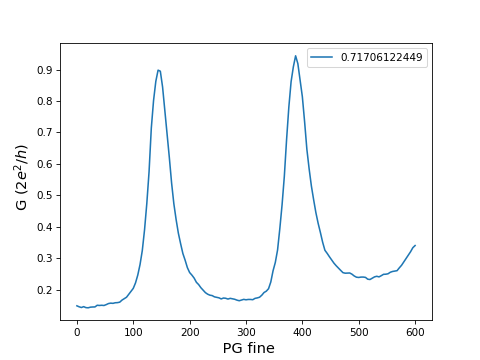

In [95]:
inputFile = 'data\device1_733.txt'

col_x = 1
conversion_x = 1
label_x = ' PG fine'

col_y = 0
conversion_y = 1
label_y = ' By'

col_z = 6
label_z = '  G $ (2e^2 /h) $'
conversion_z = 2

plot_name = ''

a.colorplot_special(inputFile, 
                   col_x, label_x, conversion_x, 
                   col_y, label_y, conversion_y, 
                   col_z, label_z, conversion_z, 
                   plot_name,  points_list =[],
                   horizontal_linecuts = [ 0.717],
                   vertical_linecuts = None,
                   x_lims = False,
                   y_lims = [0.69, 0.74], 
                  color_min = 0.10 , color_max = 0.35
         );

<IPython.core.display.Javascript object>


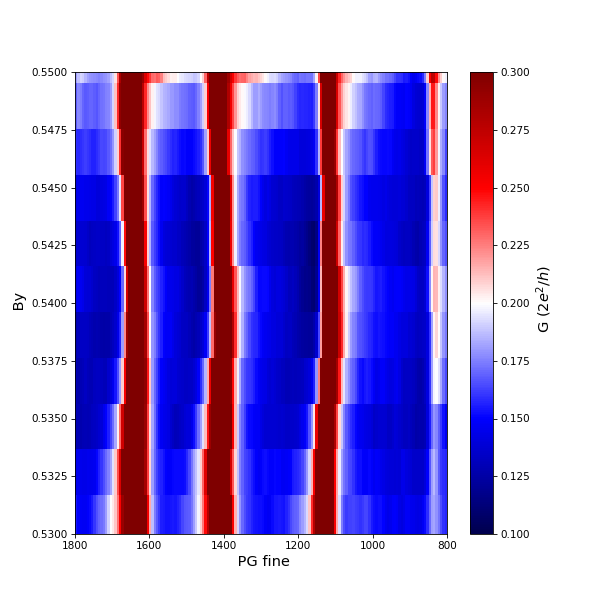

<IPython.core.display.Javascript object>


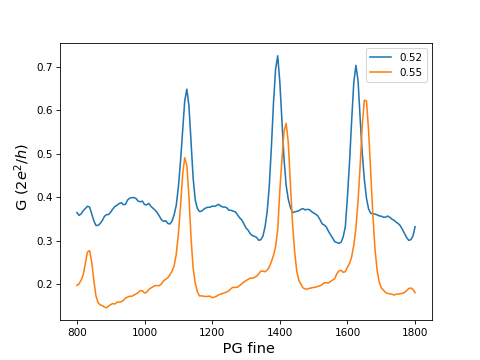

In [87]:
inputFile = 'data\device1_216.txt'

col_x = 1
conversion_x = 1
label_x = ' PG fine'

col_y = 0
conversion_y = 1
label_y = ' By'

col_z = 6
label_z = '  G $ (2e^2 /h) $'
conversion_z = 2

plot_name = ''

a.colorplot_special(inputFile, 
                   col_x, label_x, conversion_x, 
                   col_y, label_y, conversion_y, 
                   col_z, label_z, conversion_z, 
                   plot_name,  points_list =[],
                   horizontal_linecuts = [ 0.52, 0.55],
                   vertical_linecuts = None,
                   x_lims = False,
                   y_lims = [ 0.53, 0.55], 
                  color_min = 0.1 , color_max = 0.3 
         );